In [2]:
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
gpcp_ds = xr.open_mfdataset("/Users/brianpm/Dropbox/Data/GPCP/gpcp_v02r03_monthly_*.nc")
gpcp_ds

<xarray.Dataset> Size: 43MB
Dimensions:       (time: 504, latitude: 72, nv: 2, longitude: 144)
Coordinates:
  * latitude      (latitude) float32 288B -88.75 -86.25 -83.75 ... 86.25 88.75
  * longitude     (longitude) float32 576B 1.25 3.75 6.25 ... 353.8 356.2 358.8
  * time          (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2020-12-01
Dimensions without coordinates: nv
Data variables:
    lat_bounds    (time, latitude, nv) float32 290kB dask.array<chunksize=(1, 72, 2), meta=np.ndarray>
    lon_bounds    (time, longitude, nv) float32 581kB dask.array<chunksize=(1, 144, 2), meta=np.ndarray>
    time_bounds   (time, nv) datetime64[ns] 8kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    precip        (time, latitude, longitude) float32 21MB dask.array<chunksize=(1, 72, 144), meta=np.ndarray>
    precip_error  (time, latitude, longitude) float32 21MB dask.array<chunksize=(1, 72, 144), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                CF-1.6, ACDD 1.3
    title:                      Global Precipitation Climatatology Project (G...
    source:                     oc.197901.sg
    references:                 Huffman et al. 1997, http://dx.doi.org/10.117...
    history:                    1) �R
`�, Dr. Jian-Jian Wang, U of Maryland,...
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0, NOAA ...
    ...                         ...
    metadata_link:              gov.noaa.ncdc:C00979
    product_version:            v23rB1
    platform:                   NOAA POES (Polar Orbiting Environmental Satel...
    sensor:                     AVHRR>Advanced Very High Resolution Radiometer
    spatial_resolution:         2.5 degree
    comment:                    Processing computer: eagle2.umd.edu

In [4]:
w = np.cos(np.radians(gpcp_ds.latitude))
p_globalaverage = gpcp_ds['precip'].weighted(w).mean(dim=("latitude","longitude"))

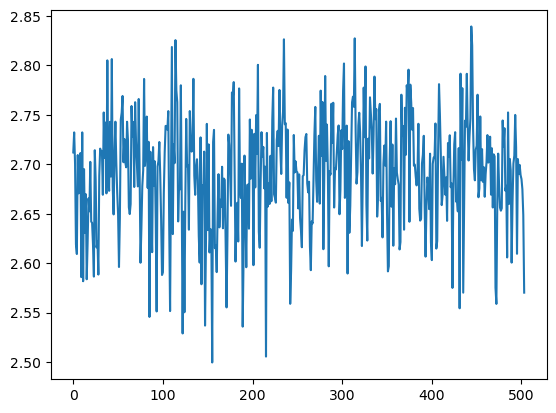

In [6]:
plt.plot(p_globalaverage)